<a href="https://colab.research.google.com/github/evasseva/evasseva/blob/main/mnist_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [11]:
print('Train set number: %d' % (X_train.shape[0]))
print('Test set number: %d' % (y_train.shape[0]))

Train set number: 60000
Test set number: 60000


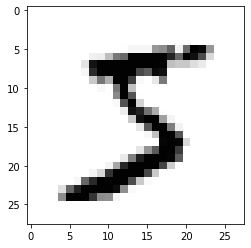

In [12]:
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [13]:
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%-3s' % i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [14]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

In [15]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [16]:
print('class : %d' % (y_train[0]))

class : 5


In [17]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [19]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
modelpath = "./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [22]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, 
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.17973, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.17973 to 0.12966, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.12966 to 0.10665, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.10665 to 0.09874, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09874 to 0.08819, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.08819 to 0.08453, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08453 to 0.08257, saving model to ./MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08257 to 0.07824, saving model to ./MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.07824

Epoch 10: val_loss did not improve from 0.07824

Epoch 11: val_loss did not improve from 0.07824

Epoch 12: val_loss improved from 0.07824 to 0.07661, saving model to ./MNIST_MLP.hdf5

Epoch 13: val_loss did not improve from 0.07661

Epoch 14: val_loss did not improv

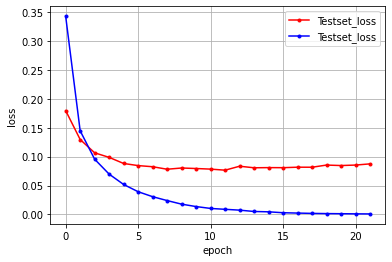

In [25]:
import numpy as np

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red",label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue",label='Testset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()